<h1>Cloud-Words SAE</h1>

<h2>Présentation</h2>

<h3>Qu'est-ce qu'un Cloud Word ?</h3>

<p>Un Cloud Word, aussi appelé nuage de mots clés, est une image représentant plusieurs mots prenant une dimension plus ou moins importante selon leur occurence dans un texte donné.</p>
    
<p>L'intérêt est de pouvoir visualiser les mots les plus utilisés et par conséquent les sujets et thèmes abordés dans le texte, dans une perspective d'analyse des données.
</p>

<h3>Dans le cas de notre étude</h3>
<p>Le jeu de données sur lequel nous travaillons étant sur des articles scientifiques, on s'attend donc à obtenir des résultats orientés sur plusieurs domaines techniques, tels que des notions mathématiques, médicales.</p>

In [ ]:
%pip install matplotlib wordcloud tensorflow tqdm

<h2>Mise en place du code</h2>



<h3>Importation des différentes bibliothèques Python</h3>

<ul>
    <li>json pour la manipulation des données au format JSON.</li>
    <li>matplotlib.pyplot pour la création de datavisualisations.</li>
    <li>wordcloud pour générer des nuages de mots à partir de texte.</li>
    <li>tensorflow pour récupérer notre jeu de données.</li>
    <li>time pour la gestion du temps, par exemple, pour mesurer la durée d'exécution d'une opération.</li>
    <li>pandas pour la manipulation et l'analyse des données.</li>
</ul>

In [ ]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import tensorflow as tf
import time
import pandas as pd

<h3>Importation des datasets</h3>

<p>Pour créer notre nuage de mots, nous importons trois ensembles de données différents : le jeu de données d'entraînement, celui de test et enfin celui de validation. Grâce aux nuages de mots que nous allons générer, nous pourrons rapidement visualiser la couverture globale des thèmes abordés dans l'ensemble des données, et ainsi les comparer entre eux</p>

In [ ]:
from google.colab import drive
import json
import os
import sys

In [ ]:
drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/package')
import datasets_scientific_paper as load_ds

Mounted at /content/drive
Mounted at /content/drive


In [ ]:
pathToDataset = "drive/MyDrive/chunking-dataset"

train_data, train_labels = load_ds.load_dataset(pathToDataset, "train")
test_data, test_labels = load_ds.load_dataset(pathToDataset, "test")
val_data, val_labels = load_ds.load_dataset(pathToDataset, "val")

<h3>Création des Word Cloud</h3>

<p>Dans un premier temps, pour créer nos nuages de mots, on crée deux fonctions au préalable.</p>

<p>Tout d'abord, la fonction createText, qui prendra un ensemble de données et un nombre correspondant à la taille de l'échantillon souhaité. Cette fonction parcourra tous les articles, les regroupera en un seul texte en les concaténant.</p>
<p>On créera également la fonction displayWordCloud, ayant pour seul effet d'afficher l'image générée par l'objet WordCloud de Python.</p>

In [ ]:
def createText(dataset, sample_size):
    text = ""
    for article in dataset[:sample_size]:
        article_text = article.get('article_text', [])
        text += ' '.join(article_text) + ' '
    return text

def displayWordCloud(wordcloud):
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

<p>Ici, on appelle la fonction createText que l'on stocke dans une variable afin de pouvoir l'utiliser par la suite. On précise également une taille d'échantillon pour éviter de consommer trop de ressources.</p>

In [ ]:
sampleSize = 100
textTrain = createText(train_data,sampleSize)
textTest = createText(test_data,sampleSize)
textVal = createText(val_data,sampleSize)

<p>on génère à cette étape nos nuages de mots pour les afficher par la suite.</p>

In [ ]:
worldCloudTrain = WordCloud(width=1000, height=500,background_color='white', colormap='viridis').generate(textTrain)
worldCloudTest = WordCloud(width=1000, height=500,background_color='white', colormap='viridis').generate(textTest)
worldCloudVal = WordCloud(width=1000, height=500,background_color='white', colormap='viridis').generate(textVal)

Nuage de Mots : Train


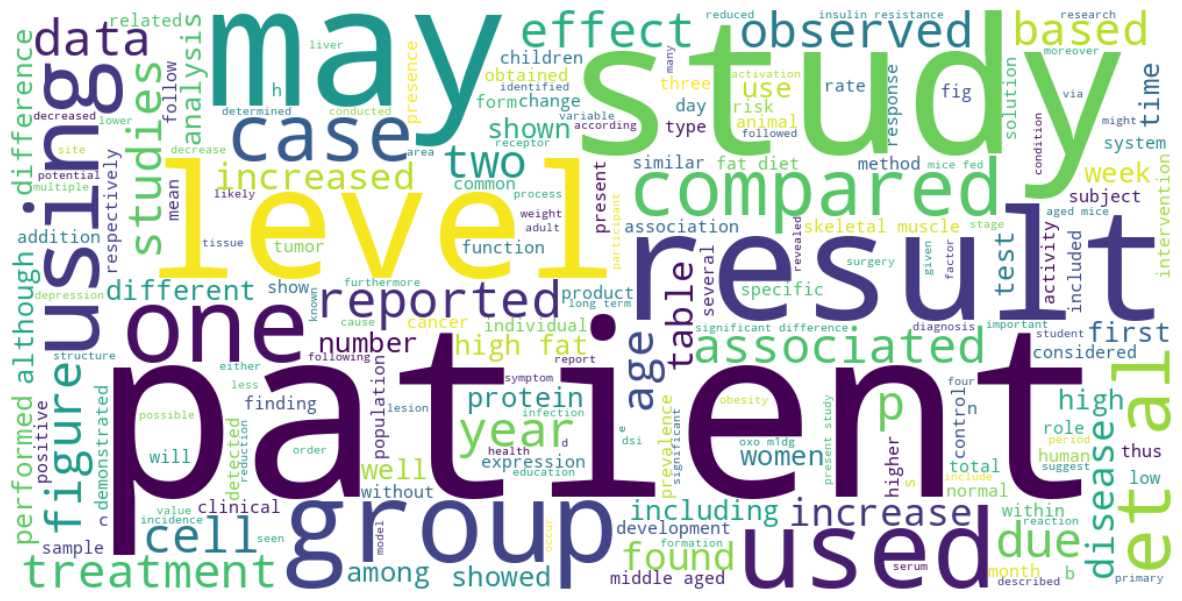

Nuage de Mots : Test


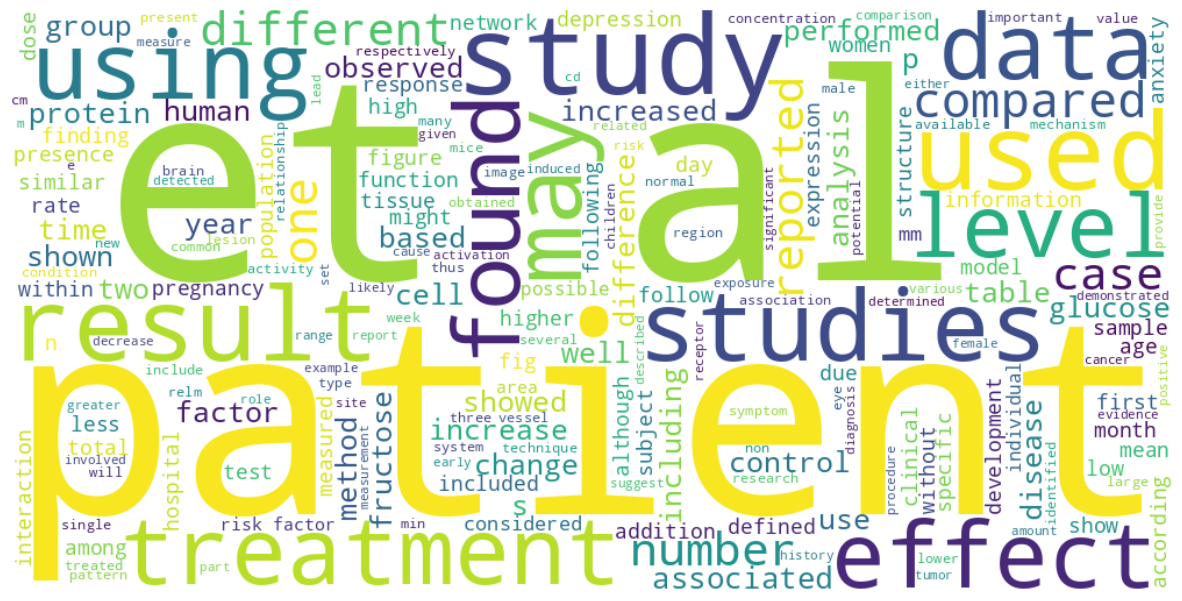

Nuage de Mots : Val


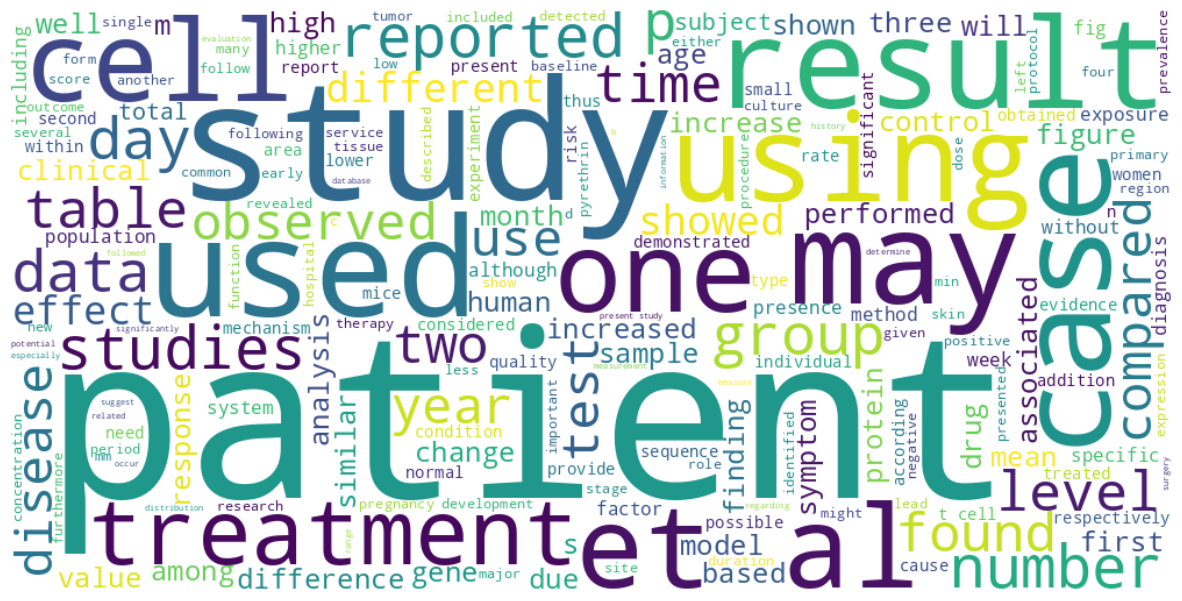

In [ ]:
print("Nuage de Mots : Train")
displayWordCloud(worldCloudTrain)
print("Nuage de Mots : Test")
displayWordCloud(worldCloudTest)
print("Nuage de Mots : Val")
displayWordCloud(worldCloudVal)

<h2>Analyse des données</h2>

<p>Maintenant que l'on a créé et affiché nos différents nuages de mots, on peut procéder à une étape importante qui est l'analyse des données. Pour ce faire, on peut utiliser WordCloud.words_ pour récupérer dans un dictionnaire Python les mots et leurs fréquences.</p>

<p>Grâce à cette information, on crée par la suite deux fonctions en Python ayant pour but de réaliser de la datavisualisation.</p>
<p>La première, wordFrequency, permettant de générer un graphique avec les fréquences de chaque mot dans les différents textes. Plus le chiffre se rapproche de 1, plus le mot apparaîtra grand dans le WordCloud.</p>

In [ ]:
def wordFrequency(wordCloud):
  keys = list(wordCloud.words_.keys())[:40]
  values = [wordCloud.words_[k] for k in keys]
  plt.figure(figsize=(10, 6))
  plt.bar(keys, values)
  plt.title('Fréquence des mots du WordCloud')
  plt.xlabel('Mots')
  plt.ylabel('Fréquence')
  plt.xticks(rotation=45, ha='right')
  plt.show()

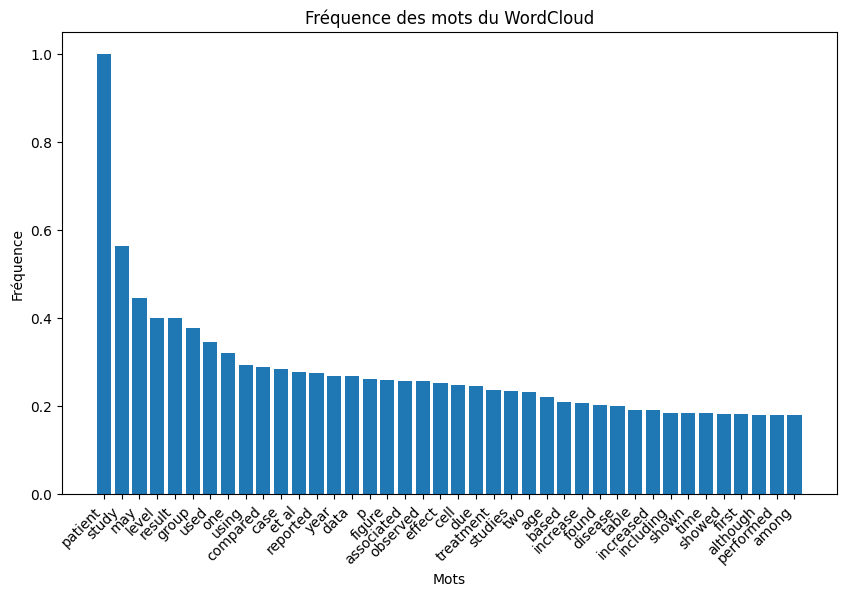

In [ ]:
wordFrequency(worldCloudTrain)

<p>Après avoir créé cette fonction, on peut désormais voir les fréquences des mots dans le nuage de mots. Cependant, ce type de datavisualisation a des limites. Par exemple, comment sont calculées les fréquences par le WordCloud, et pourquoi voit-on des mots comme "p"?</p>

<p>C'est donc à ce moment que notre deuxième fonction intervient: wordOccurrence, permettant de générer un graphe avec les mots les plus utilisés dans les différents articles et leur nombre d'occurrences.</p>

<p>Bien évidemment, les résultats affichés par ces fonction doivent être relativisés par rapport à la taille de l'échantillon que l'on a choisi précédemment.</p>


In [ ]:
def findWord(text,word): return text.lower().count(word.lower())

def wordOccurrence(wordCloud, text):
  words = [w for w in list(wordCloud.words_.keys())[:40] if len(w) > 1]
  occurrences_map = {w: findWord(text, w) for w in words}
  keys = list(occurrences_map.keys())
  values = list(occurrences_map.values())
  plt.figure(figsize=(20, 6))
  plt.bar(keys, values)
  plt.title('Occurrences des mots du WordCloud')
  plt.xlabel('Mots')
  plt.ylabel('Occurrences')
  plt.xticks(rotation=45, ha='right')
  plt.show()

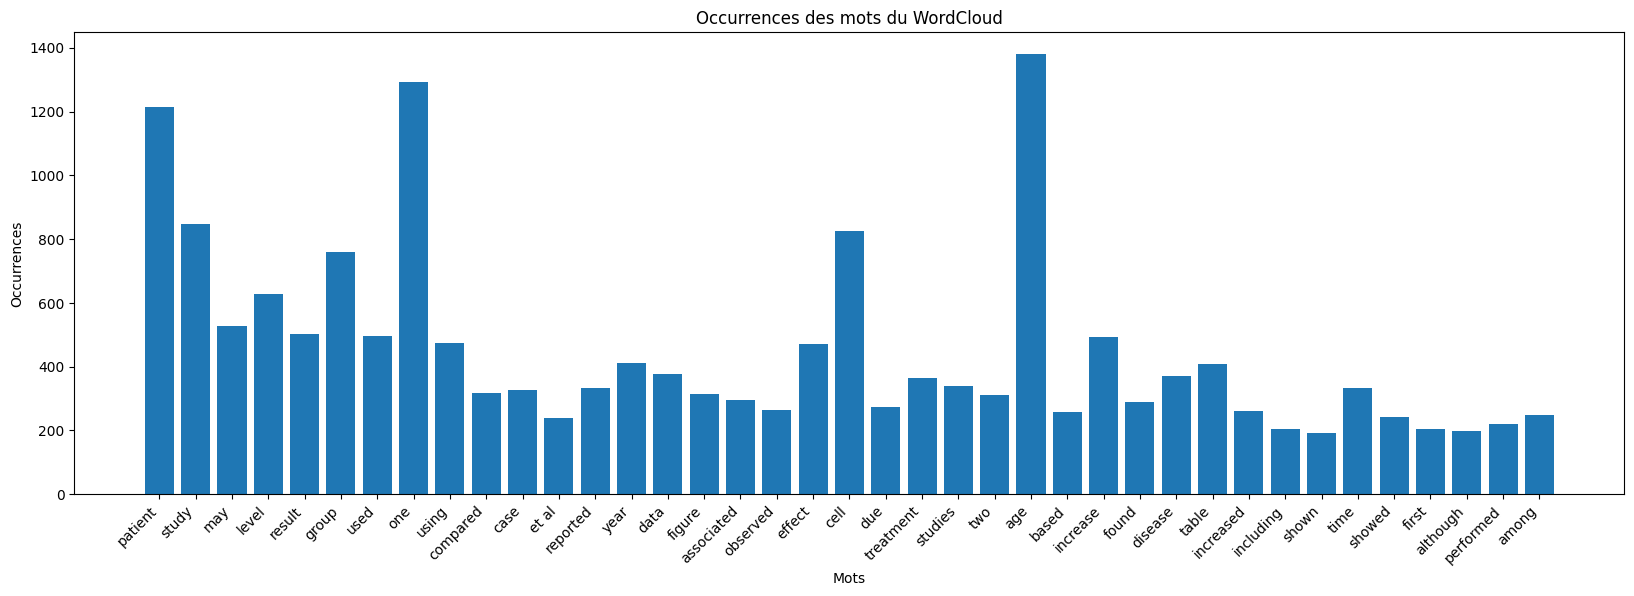

In [ ]:
wordOccurrence(worldCloudTrain,textTrain)